# Case Study 2 : Analyzing data from MovieLens
** Due Date: March 5, 2016 5:59PM**

*------------

# Problem 1: 

## Importing the MovieLens data set and merging it into a single Pandas DataFrame

In [27]:
%matplotlib inline

import matplotlib.pylab as py
import pandas as pd
import tables
from pandas import Series, DataFrame

# read all 3 .dat files and format them to be converted to DataFrame
# users - UserID::Gender::Age::Occupation::Zip-code
with open('ml-1m/users.dat', 'r') as user_file:
    user2array = [line[:-1].split('::') for line in user_file]# use line[:-1] to remove the '\n' characters
userID = [int(user[0]) for user in user2array]
gender = [user[1] for user in user2array]
age = [int(user[2]) for user in user2array]
occupation = [int(user[3]) for user in user2array]
zipcode = [user[4] for user in user2array]
user_data = {'userID':userID,
            'gender':gender,
            'age':age,
            'occupation':occupation,
            'zipcode':zipcode}
user_frame = DataFrame(user_data)

# movie - MovieID::Title::Genre
with open('ml-1m/movies.dat', 'r') as movie_file:
    movie2array = [line[:-1].split('::') for line in movie_file]# use line[:-1] to remove the '\n' characters
movieID = [int(movie[0]) for movie in movie2array]
title = [movie[1] for movie in movie2array]
genre = [movie[2] for movie in movie2array]
movie_data = {'movieID':movieID,
            'title':title,
            'genre':genre}
movie_frame = DataFrame(movie_data)

# ratings - UserID::MovieID::Rating::Timestamp
with open('ml-1m/ratings.dat', 'r') as rating_file:
    rating2array = [line[:-1].split('::') for line in rating_file]# use line[:-1] to remove the '\n' characters
userID = [int(rating[0]) for rating in rating2array]
movieID = [int(rating[1]) for rating in rating2array]
timestamp = [int(rating[3]) for rating in rating2array]
rating = [int(rating[2]) for rating in rating2array]

rating_data= {'userID':userID,
            'movieID':movieID,
            'rating':rating,
            'timestamp':timestamp}
rating_frame = DataFrame(rating_data)
temp_merge = pd.merge(rating_frame, user_frame, how='left', on=['userID']) # merge the ratings & users get temp frame
single_frame = pd.merge(temp_merge, movie_frame, how='left', on=['movieID']) # merge the temp frame & movies to get the single frame

# store the single frame into HDF5 format
store = pd.HDFStore('mdata.h5')
store['singleFrame'] = single_frame

store.close()




## Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be prepared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


In [28]:
from operator import itemgetter # used to call built-in sorted function


print len(single_frame['movieID'])
# <class 'pandas.core.groupby.DataFrameGroupBy'>
movie_grouped = single_frame.groupby('movieID')
print movie_grouped
# iterate through the DataFrameGroupBy obj
# every iterable elements of the obj is tuple format of (<type 'numpy.int64'>,<class 'pandas.core.frame.DataFrame'>)
'''
for ele in movie_grouped:
    print len(ele[1][ele[1]['gender'] == 'M'])
    print type(ele[1][ele[1]['gender'] == 'M']['rating'])
    break
'''

# How many movies have an average rating over 4.5 among men? How about women?
# Equivalent Sql: select movieID from Table where gender=='men' grouped by movieID having avg(ratings)>4.5
movies_rating_over45 = [movie[0]
                            for movie in movie_grouped 
                                # type(movie[1][movie[1]['gender'] == 'M']['rating']) <class 'pandas.core.series.Series'>
                                if movie[1]['rating'].mean() > 4.5]
print "%d movies have an average rating over 4.5" %len(movies_rating_over45)

# How many movies have an average rating over 4.5 among men? How about women?
# Equivalent Sql: select movieID from Table where gender=='men' grouped by movieID having avg(ratings)>4.5
movies_rating_over45_byM = [movie[0]
                            for movie in movie_grouped 
                                # type(movie[1][movie[1]['gender'] == 'M']['rating']) <class 'pandas.core.series.Series'>
                                if movie[1][movie[1]['gender'] == 'M']['rating'].mean() > 4.5]
print "%d movies have an average rating over 4.5 among men" %len(movies_rating_over45_byM)

movies_rating_over45_byF = [movie[0]
                            for movie in movie_grouped
                                if movie[1][movie[1]['gender'] == 'F']['rating'].mean() > 4.5]
print "%d movies have an average rating over 4.5 among women" %len(movies_rating_over45_byF)

# How many movies have an median rating over 4.5 among men over age 30? How about women over age 30?
# select movieID from Table where gender=='men' & age>30 grouped by movieID having median(ratings)>4.5
movies_rating_over45_byM_over30 = [movie[0]
                            for movie in movie_grouped
                                if movie[1][ (movie[1]['gender'] == 'M')&(movie[1]['age'] > 30) ]['rating'].median() > 4.5]
print "%d movies have a median rating over 4.5 among men over age 30" %len(movies_rating_over45_byM_over30)

movies_rating_over45_byF_over30 = [movie[0]
                            for movie in movie_grouped
                                if movie[1][ (movie[1]['gender'] == 'F')&(movie[1]['age'] > 30) ]['rating'].median() > 4.5]
print "%d movies have a median rating over 4.5 among women over age 30" %len(movies_rating_over45_byF_over30)


1000209
21 movies have an average rating over 4.5
23 movies have an average rating over 4.5 among men
51 movies have an average rating over 4.5 among women
86 movies have a median rating over 4.5 among men over age 30
149 movies have a median rating over 4.5 among women over age 30


In [29]:
# Creates a list of movies with the number of ratings they have received for the popularity question
Y = single_frame.groupby('title').size()

In [30]:
Y.sort_values(ascending=False)

title
American Beauty (1999)                                                   3428
Star Wars: Episode IV - A New Hope (1977)                                2991
Star Wars: Episode V - The Empire Strikes Back (1980)                    2990
Star Wars: Episode VI - Return of the Jedi (1983)                        2883
Jurassic Park (1993)                                                     2672
Saving Private Ryan (1998)                                               2653
Terminator 2: Judgment Day (1991)                                        2649
Matrix, The (1999)                                                       2590
Back to the Future (1985)                                                2583
Silence of the Lambs, The (1991)                                         2578
Men in Black (1997)                                                      2538
Raiders of the Lost Ark (1981)                                           2514
Fargo (1996)                                              

In [31]:
# Table of average ratings by age group and movie for adressing how easy an age group is to please
Z=single_frame.pivot_table('rating',index='title',columns='age',aggfunc='mean')

In [32]:
# Prints the correlation matrix of each age group's average ratings to each other.
# Stronger correlation => the two groups have similar opinions about movies
Z.corr()

age,1,18,25,35,45,50,56
age,,,,,,,
1,1.000000,0.532781,0.565422,0.507420,0.493613,0.463137,0.408927
18,0.532781,1.000000,0.691375,0.602674,0.566655,0.536361,0.451319
25,0.565422,0.691375,1.000000,0.763290,0.688557,0.678875,0.584465
35,0.507420,0.602674,0.763290,1.000000,0.687806,0.690296,0.618754
45,0.493613,0.566655,0.688557,0.687806,1.000000,0.663278,0.592615
50,0.463137,0.536361,0.678875,0.690296,0.663278,1.000000,0.612292
56,0.408927,0.451319,0.584465,0.618754,0.592615,0.612292,1.000000


In [33]:
# Prints the variances of each age group's average ratings for movies.
# Lower variances => easier to please
Z.var()

age
1     0.792012
18    0.627542
25    0.513856
35    0.487662
45    0.512250
50    0.621890
56    0.672545
dtype: float64

In [34]:
# Table of average ratings by occupation and movie
    # We did not end up using this data as it didn't seem consistent enough to make meaningful
W=single_frame.pivot_table('rating',index='title',columns='occupation',aggfunc='mean')

In [35]:
# Variances of average movie ratings by occupation
W.var()

occupation
0     0.522091
1     0.668208
2     0.655581
3     0.595946
4     0.622567
5     0.589467
6     0.736404
7     0.533510
8     1.050865
9     0.608593
10    0.850595
11    0.894547
12    0.620419
13    0.718821
14    0.652856
15    0.724682
16    0.599353
17    0.584908
18    0.657654
19    0.930669
20    0.671391
dtype: float64

# Problem 2: Expand our investigation to histograms

* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

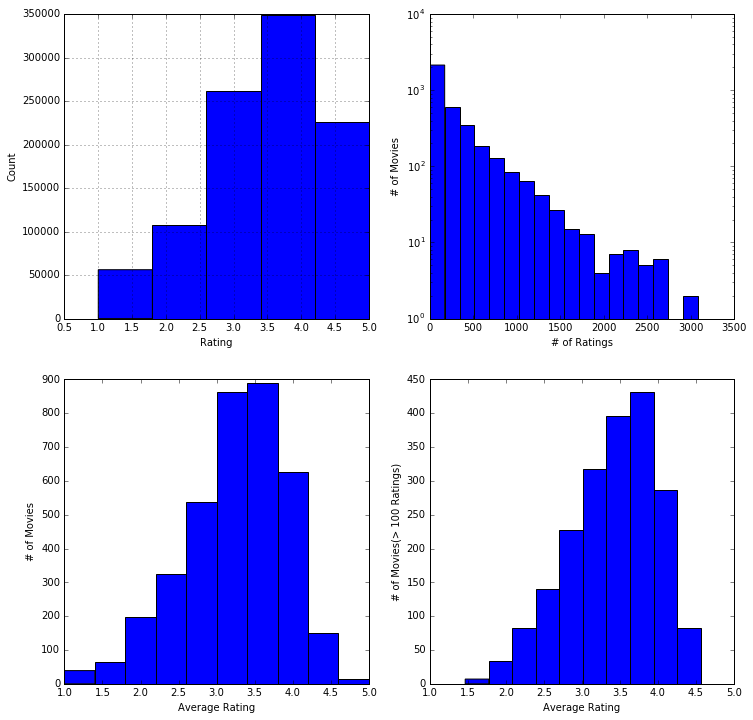

In [36]:
from matplotlib import pyplot as plt
import numpy as np
# print matplotlib.matplotlib_fname()

plt.figure(figsize=(12,12))

# API doc for histogram: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist
# Plot a histogram of the ratings of all movies.
plt.subplot(2,2,1)
single_frame['rating'].hist(bins=5, color="blue")
plt.xlabel('Rating')
plt.ylabel('Count')

# Plot a histogram of the number of ratings each movie received
plt.subplot(2,2,2)
movies_rating_count = [movie[1]['rating'].count()
                            for movie in movie_grouped]
# movie_ids = [ i+1 for i in range( len(movies_rating_mean) ) ]
plt.hist(movies_rating_count, bins=20, color="blue", log=True)#len(movie_frame));
plt.xlabel('# of Ratings')
plt.ylabel('# of Movies')

# Plot a histogram of the average rating for each movie
plt.subplot(2,2,3)
movies_rating_mean = [movie[1]['rating'].mean()
                            for movie in movie_grouped ]
movie_ids = [ i+1 for i in range( len(movies_rating_mean) ) ]
plt.hist(movies_rating_mean, bins = 10, color="blue") # movie_ids, movies_rating_mean, width, color="blue"
plt.xlabel('Average Rating')
plt.ylabel('# of Movies')

# Plot a histogram of the average rating for movies which are rated more than 100 times.
plt.subplot(2,2,4)
movies_ids_rating_over100 = [movie[0]
                                for movie in movie_grouped 
                                    if movie[1]['rating'].count() > 100]
movies_rating_over100 = [movie[1]['rating'].mean()
                                for movie in movie_grouped 
                                    if movie[1]['rating'].count() > 100]
plt.hist(movies_rating_over100, bins = 10, color="blue")
plt.xlabel('Average Rating')
plt.ylabel('# of Movies(> 100 Ratings)')

In [37]:
V=single_frame.pivot_table('rating',index='title',columns='age',aggfunc='mean')

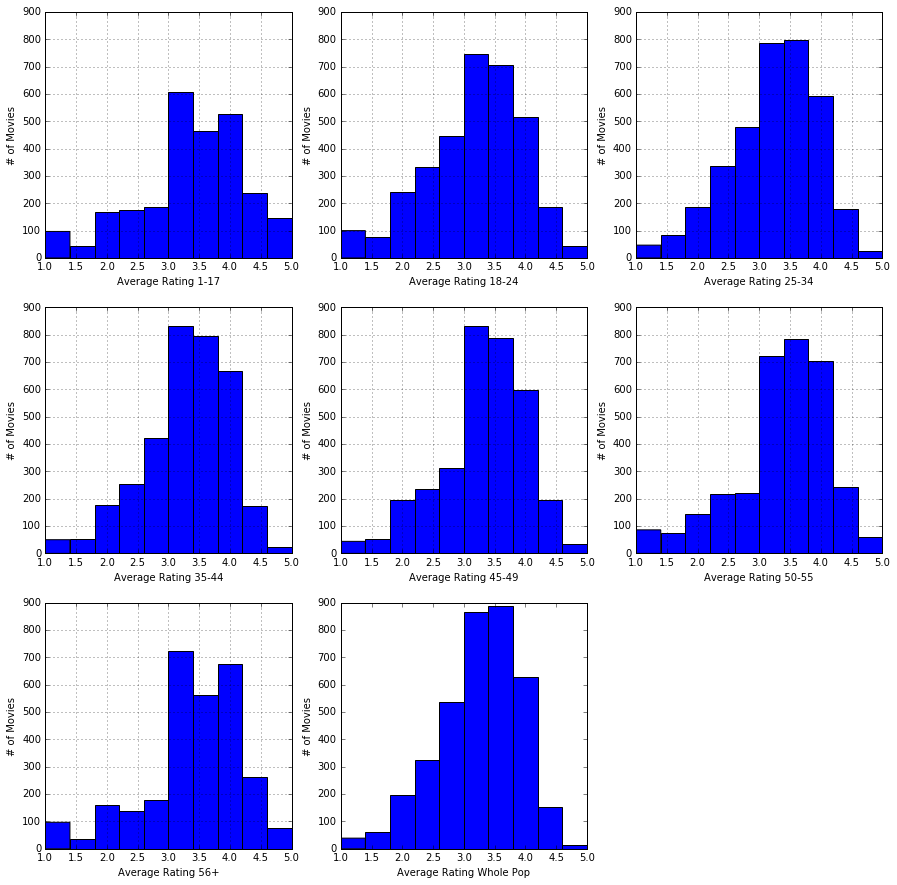

In [38]:
# Plots a histogram for each age group and the total population of how # of movies with a given average rating
plt.subplot(3,3,1)
V[1].hist(figsize = [15,15])
plt.xlabel('Average Rating 1-17')
plt.ylabel('# of Movies')
plt.ylim(0,900)

plt.subplot(3,3,2)
V[18].hist()
plt.xlabel('Average Rating 18-24')
plt.ylabel('# of Movies')
plt.ylim(0,900)

plt.subplot(3,3,3)
V[25].hist()
plt.xlabel('Average Rating 25-34')
plt.ylabel('# of Movies')
plt.ylim(0,900)

plt.subplot(3,3,4)
V[35].hist()
plt.xlabel('Average Rating 35-44')
plt.ylabel('# of Movies')
plt.ylim(0,900)

plt.subplot(3,3,5)
V[45].hist()
plt.xlabel('Average Rating 45-49')
plt.ylabel('# of Movies')
plt.ylim(0,900)

plt.subplot(3,3,6)
V[50].hist()
plt.xlabel('Average Rating 50-55')
plt.ylabel('# of Movies')
plt.ylim(0,900)

plt.subplot(3,3,7)
V[56].hist()
plt.xlabel('Average Rating 56+')
plt.ylabel('# of Movies')
plt.ylim(0,900)

plt.subplot(3,3,8)
plt.hist(movies_rating_mean, bins = 10, color="blue") # movie_ids, movies_rating_mean, width, color="blue"
plt.xlabel('Average Rating Whole Pop')
plt.ylabel('# of Movies')

In [39]:
# Data for our conjecture about the distribution of data by age group
# Produces histogram values (10 bins) of data for the number of movies in each age group
    # Basically, produces values of the y axis for each box of the histograms above

import numpy as np

pop35,_ = np.histogram(V[35].dropna().values, bins = 10)
totpop,_ = np.histogram(movies_rating_mean, bins = 10)
pop25,_ = np.histogram(V[25].dropna().values, bins = 10)
pop1,_ = np.histogram(V[1].dropna().values, bins = 10)
pop45,_ = np.histogram(V[45].dropna().values, bins = 10)
pop18,_ = np.histogram(V[18].dropna().values, bins = 10)
pop50,_ = np.histogram(V[50].dropna().values, bins = 10)
pop56,_ = np.histogram(V[56].dropna().values, bins = 10)

# Converts each age group's average ratings to percentages
totpcnt = totpop/3706.*100
pop35pcnt = 100.*pop35/pop35.sum()
pop45pcnt = 100.*pop45/pop45.sum()
pop1pcnt = 100.*pop1/pop1.sum()
pop18pcnt = 100.*pop18/pop18.sum()
pop25pcnt = 100.*pop25/pop25.sum()
pop50pcnt = 100.*pop50/pop50.sum()
pop56pcnt = 100.*pop56/pop56.sum()

In [40]:
# Performs a one way chi square test of each age group versus the total population to test goodness of fit
    # High test statistic/low p-value implies poor fit
    # low test statistic/high p-value implies good fit
from scipy.stats import chisquare

print chisquare(pop1pcnt, f_exp=totpcnt)
print chisquare(pop18pcnt, f_exp=totpcnt)
print chisquare(pop25pcnt, f_exp=totpcnt)
print chisquare(pop35pcnt, f_exp=totpcnt)
print chisquare(pop45pcnt, f_exp=totpcnt)
print chisquare(pop50pcnt, f_exp=totpcnt)
print chisquare(pop56pcnt, f_exp=totpcnt)

Power_divergenceResult(statistic=88.029979527428353, pvalue=4.0420000404740389e-15)
Power_divergenceResult(statistic=7.79248913512986, pvalue=0.55518616779426044)
Power_divergenceResult(statistic=1.0616001580067413, pvalue=0.99928193226596074)
Power_divergenceResult(statistic=1.6607928919957753, pvalue=0.99576889680746106)
Power_divergenceResult(statistic=4.5744071960030714, pvalue=0.8697200870774765)
Power_divergenceResult(statistic=17.204860817149722, pvalue=0.045602871941816517)
Power_divergenceResult(statistic=34.71946348255797, pvalue=6.6767440494716637e-05)


*------------------------

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

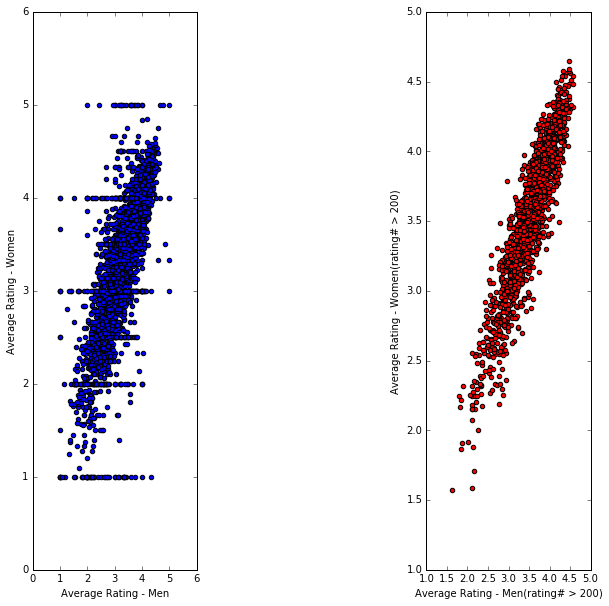

In [41]:

# API doc for plt.scatter: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter

# Make a scatter plot of men versus women and their mean rating for every movie.
plt.figure(figsize=(10,10))

movies_rating_byM = [ movie[1][movie[1]['gender'] == 'M']['rating'].mean()
                            for movie in movie_grouped ]

movies_rating_byF = [ movie[1][movie[1]['gender'] == 'F']['rating'].mean()
                            for movie in movie_grouped ]
plt.subplot(1,3,1)
plt.scatter(movies_rating_byM, movies_rating_byF, c=['blue'])
plt.xlabel('Average Rating - Men')
plt.ylabel('Average Rating - Women')


# Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
movies_rating_byM_200plus = [ movie[1][movie[1]['gender'] == 'M']['rating'].mean()
                            for movie in movie_grouped 
                                if movie[1]['rating'].count() > 200 ]

movies_rating_byF_200plus = [ movie[1][movie[1]['gender'] == 'F']['rating'].mean()
                            for movie in movie_grouped 
                                 if movie[1]['rating'].count() > 200 ]
plt.subplot(1,3,3)
plt.scatter(movies_rating_byM_200plus, movies_rating_byF_200plus, c=['red'])
plt.xlabel('Average Rating - Men(rating# > 200)')
plt.ylabel('Average Rating - Women(rating# > 200)')

In [42]:
# Store the data above in a pivot table
X=single_frame.pivot_table('rating',index='title',columns='gender',aggfunc='mean')

In [43]:
# Prints the correlation matrix of men's ratings versus women's ratings
X.corr()

gender,F,M
gender,,
F,1.00000,0.76319
M,0.76319,1.00000


In [44]:
# Prints the correlation matrix of men's ratings versus women's ratings for  movies with > 200 ratings
np.corrcoef(movies_rating_byM_200plus, movies_rating_byF_200plus)

array([[ 1.        ,  0.91836139],
       [ 0.91836139,  1.        ]])

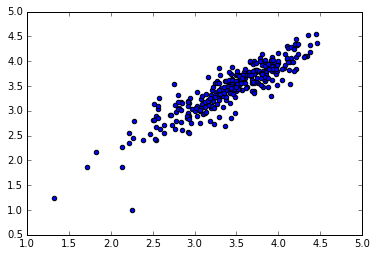

In [45]:
# Plots the average ratings of males versus females for each genre
gender_genre=single_frame.pivot_table('rating',index='genre',columns='gender',aggfunc='mean')
plt.scatter(gender_genre['M'], gender_genre['F'], c=['blue'])

In [46]:
# Prints the correlation matrix of the above data
gender_genre.corr()

gender,F,M
gender,,
F,1.000000,0.901539
M,0.901539,1.000000


*------------------------

# Problem 4: (20 points total)
## Open Ended Question:  Business Intelligence


Question we asked: Is there a relationship between the number of ratings a movie has and its average rating?

In [47]:
# Arrays of the average ratings of each movie and the count of ratings for each movie
movie_means=single_frame.pivot_table('rating',index=['movieID','title'],aggfunc='mean').values
movie_counts=single_frame.pivot_table('rating',index=['movieID','title'],aggfunc='count').values

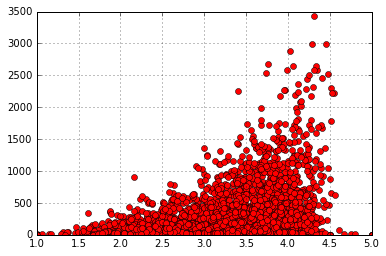

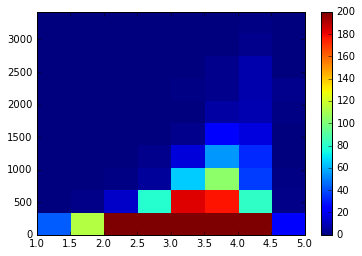

In [48]:
# Code lovingly adapted from http://stackoverflow.com/questions/24001361/having-trouble-plotting-2-d-histogram-with-numpy-histogram2d-and-matplotlib
# Plots a 2D histogram of the data movie_means and movie_counts
def doPlot():

    x = movie_means

    y = movie_counts

    gridx = np.linspace(min(x),max(x),9)
    gridy = np.linspace(min(y),max(y),11)

    H, xedges, yedges = np.histogram2d(x, y, bins=[gridx, gridy])

    plt.figure()
    plt.plot(x, y, 'ro')
    plt.grid(True)


    plt.figure()
    myextent  =[xedges[0],xedges[-1],yedges[0],yedges[-1]]
    plt.imshow(H[0:12,0:12].T,origin='low',extent=myextent, vmin = 0, vmax = 200, interpolation='nearest',aspect='auto')
    #plt.plot(x,y,'ro')
    plt.colorbar()

    plt.show()
    

if __name__=="__main__":
    doPlot()

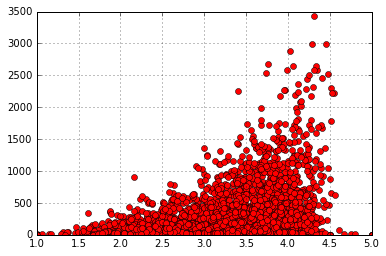

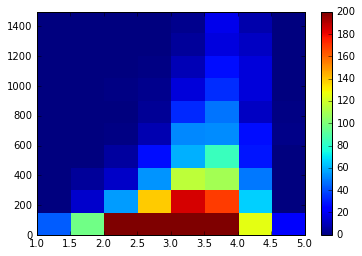

In [49]:
# Code lovingly adapted from http://stackoverflow.com/questions/24001361/having-trouble-plotting-2-d-histogram-with-numpy-histogram2d-and-matplotlib
# Plots a 2D histogram of the data movie_means and movie_counts that has been "zoomed in" onto movies with 1500 or fewer ratings.
def doPlot():

    x = movie_means

    y = movie_counts

    gridx = np.linspace(min(x),max(x),9)
    gridy = np.linspace(min(y),1500,11)

    H, xedges, yedges = np.histogram2d(x, y, bins=[gridx, gridy])

    plt.figure()
    plt.plot(x, y, 'ro')
    plt.grid(True)


    plt.figure()
    myextent  =[xedges[0],xedges[-1],yedges[0],yedges[-1]]
    plt.imshow(H[0:12,0:12].T,origin='low',extent=myextent, vmin = 0, vmax = 200, interpolation='nearest',aspect='auto')
    #plt.plot(x,y,'ro')
    plt.colorbar()

    plt.show()
    

if __name__=="__main__":
    doPlot()

### Extra Code:

In [50]:
#Produces the number of ratings given by each age group
Y=single_frame.pivot_table('rating',index=[ 'age'], aggfunc='count').values
Y

array([ 27211, 183536, 395556, 199003,  83633,  72490,  38780], dtype=int64)